In [1]:
import os
import pickle
from pathlib import Path

import fdsvismap as fv
import jupedsim as jps
import matplotlib.pyplot as plt
import pedpy
import shapely
from matplotlib.patches import Circle
from shapely import Polygon

## Config parameters

In [2]:
num_agents = 30
premovement_time = 500 # seconds
v0 = 1.0
seed = 1

c0 = 3.0
# Set times when the simulation should be evaluated
update_time = 1
max_vis_simulation_time = 1000
times = range(premovement_time, max_vis_simulation_time, update_time)
trajectory_file = f"output_N{num_agents}.sqlite"  # output file

exits = [
    #left
    Polygon([(2, 15.5), (3, 15.5), (3, 16.5), (2, 16.5), (2, 15.5)]),
    # right
    Polygon([(25, 15.5), (27, 15.5), (27, 16.5), (25, 16.5), (25, 15.5)]),
]   
distance_to_waypoints = 0.5

waypoints = [
    (13.5, 8.5, 0),
    (10.5, 4.5, 180),
    (18.5, 6.5, 270), 
    (25, 14.5, 180), 
]

## Vismap config

In [3]:
def load_or_compute_vis(sim_dir, waypoints, exits, times, pickle_path):
    if pickle_path.is_file():
        try:
            with open(pickle_path, 'rb') as file:
                vis = pickle.load(file)
            print("Vis object loaded successfully.")
        except FileNotFoundError:
            print(f"No file found at {pickle_path}, please check the file path.")
        except Exception as e:
            print(f"An error occurred while loading the visualization: {e}")
    else:
        # Read and process data if not existing
        vis = fv.VisMap()
        vis.read_fds_data(str(sim_dir))
        vis.set_start_point(8, 8)

        for wp in waypoints:
            vis.set_waypoint(x=wp[0], y=wp[1], c=c0, alpha=wp[2])

        # Set waypoint for exit
        vis.set_waypoint(x=exits[1].centroid.xy[0][0], y=exits[1].centroid.xy[1][0], c=c0, alpha=180)

        # Define time points and compute the visualization
        vis.set_time_points(times)
        vis.compute_all()

        # Save results to pickle file
        pickle_path.parent.mkdir(exist_ok=True)  # Ensure directory exists
        try:
            # Serialize the visualization object to a pickle file
            with open(pickle_path, 'wb') as file:
                pickle.dump(vis, file)
                print("Visualization saved successfully.")
        except Exception as e:
            print(f"An error occurred while saving the visualization: {e}")

    return vis

project_root = Path(os.path.abspath('')).parent
sim_dir = project_root / "fds_data"
pickle_path = project_root / "processed_data" / "vismap.pkl"
times = range(0, 1000, 50)
vis = load_or_compute_vis(sim_dir, waypoints, exits, times, pickle_path)

Vis object loaded successfully.


In [4]:
num_agents = 30
premovement_time = 500 # seconds
v0 = 1.0
seed = 1

c0 = 3.0
# Set times when the simulation should be evaluated
update_time = 1
max_vis_simulation_time = 1000
times = range(premovement_time, max_vis_simulation_time, update_time)
trajectory_file = f"output_N{num_agents}.sqlite"  # output file

exits = [
    #left
    Polygon([(2, 15.5), (3, 15.5), (3, 16.5), (2, 16.5), (2, 15.5)]),
    # right
    Polygon([(25, 15.5), (27, 15.5), (27, 16.5), (25, 16.5), (25, 15.5)]),
]   
distance_to_waypoints = 0.5

waypoints = [
    (13.5, 8.5, 0),
    (10.5, 4.5, 180),
    (18.5, 6.5, 270),
    (25, 15, 180),
]

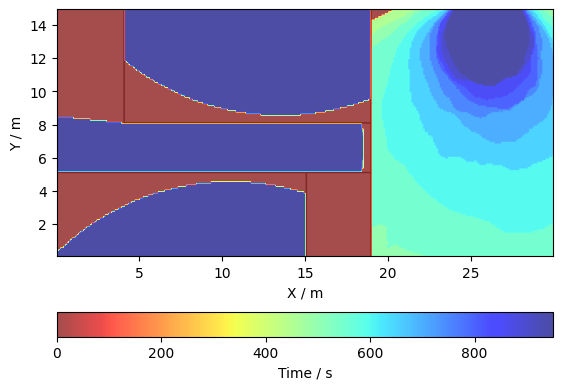

In [5]:
fig, ax = vis.create_aset_map_plot(plot_obstructions=True)

True
vis.get_distance_to_wp(x=17, y=5, waypoint_id=1)=6.519202405202649
30


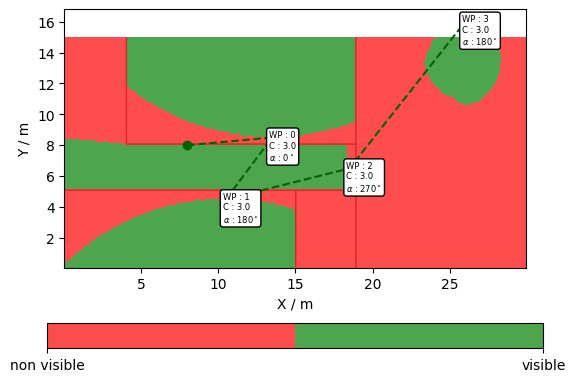

In [6]:
fig, ax = vis.create_time_agg_wp_agg_vismap_plot(plot_obstructions=True)

# Check if waypoint is visible from given location at given time
print(vis.wp_is_visible(time=50, x=12.5, y=0.6, waypoint_id=1))

# Get distance from waypoint to given location
print(f"{vis.get_distance_to_wp(x=17, y=5, waypoint_id=1)=}")

# Calculate local visibility at given location and time, considering a specific c factor
print(vis.get_local_visibility(time=100, x=5, y=6, c=3))


[15.274659227759699,
 15.274659227759699,
 15.274659227759699,
 15.274659227759699,
 16.986857891091415,
 16.986857891091415,
 16.986857891091415,
 16.986857891091415,
 16.986857891091415,
 16.986857891091415,
 16.986857891091415,
 18.567519433142934,
 18.567519433142934,
 18.567519433142934,
 18.567519433142934,
 18.567519433142934,
 18.567519433142934,
 15.479466543318866,
 15.479466543318866,
 15.479466543318866,
 15.479466543318866,
 15.479466543318866,
 15.479466543318866,
 15.479466543318866,
 13.694096338608842,
 13.694096338608842,
 13.694096338608842,
 13.694096338608842,
 13.694096338608842,
 13.694096338608842,
 13.694096338608842,
 12.788586845807737,
 12.788586845807737,
 12.788586845807737,
 12.788586845807737,
 12.788586845807737,
 12.788586845807737,
 11.578466965010042,
 11.578466965010042,
 11.578466965010042,
 11.578466965010042,
 11.578466965010042,
 11.578466965010042,
 11.578466965010042,
 14.787025331610147,
 14.787025331610147,
 14.787025331610147,
 14.787025331

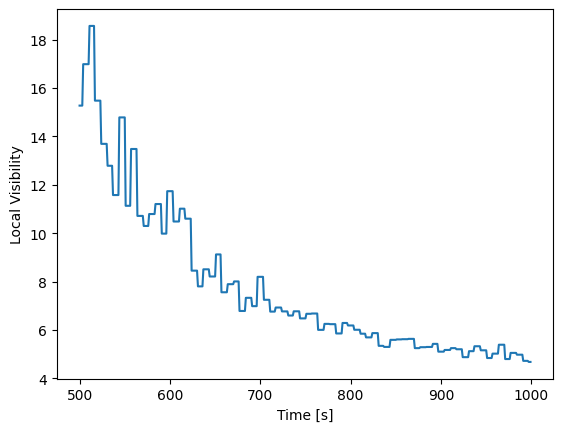

In [7]:
v= []
for t in times:
    v.append(vis.get_local_visibility(time=t, x=25, y=12, c=3))
    #v.append(vis.get_local_visibility(time=t, x=7, y=4, c=3))

plt.plot(times, v)
plt.xlabel('Time [s]')
plt.ylabel('Local Visibility')
v

Text(0, 0.5, 'Desired Speed [m/s]')

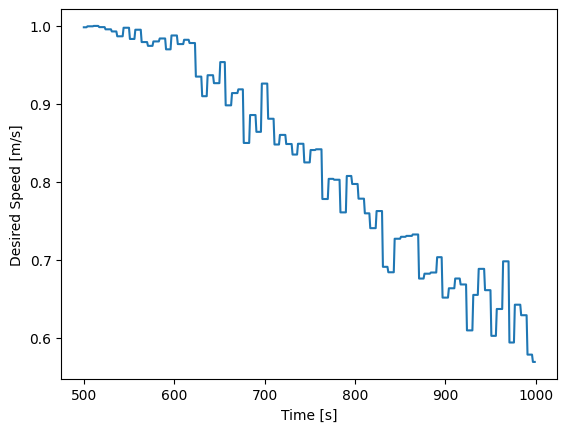

In [8]:
import numpy as np
def calculate_desired_speed(v, c, max_speed, range=2.0):
    # Calculate the proximity of v to c, and adjust speed accordingly
    if v <= c:
        return 0
    else:
        # Create a linear relation or any other functional form as needed
        # This example uses an exponential decay to decrease speed as v approaches c
        return max_speed * (1 - np.exp(-(v - c)/range ))
    
desired_speeds = [calculate_desired_speed(visibility, 3, max_speed=1.0) for visibility in v]
plt.plot(times,desired_speeds)
plt.xlabel('Time [s]')
plt.ylabel('Desired Speed [m/s]')


## Definition of Start Positions and Exit

Now we define the spawning area and way points for the leader to follow.

In [9]:
from shapely import from_wkt
with open("geometry.wkt", "r") as file:
    data = file.readlines()

wkt_data = from_wkt(data)
area = wkt_data[0]
obstacles = wkt_data[1:]
obstacle = shapely.union_all(obstacles)
walkable_area = pedpy.WalkableArea(shapely.difference(area, obstacle))

In [10]:
spawning_area1 = Polygon([(0, 0), (0, 5), (15, 5), (15, 0)])
spawning_area2 = Polygon([(4.1, 8), (19, 8), (19, 14.5), (4.1, 14.5)])
pos_in_spawning_areas = [
    jps.distributions.distribute_by_number(
        polygon=spawning_area2,
        number_of_agents=num_agents,
        distance_to_agents=0.4,
        distance_to_polygon=0.3,
        seed=seed,
    ),
    jps.distributions.distribute_by_number(
        polygon=spawning_area1,
        number_of_agents=num_agents,
        distance_to_agents=0.4,
        distance_to_polygon=0.3,
        seed=seed,
    ),
]

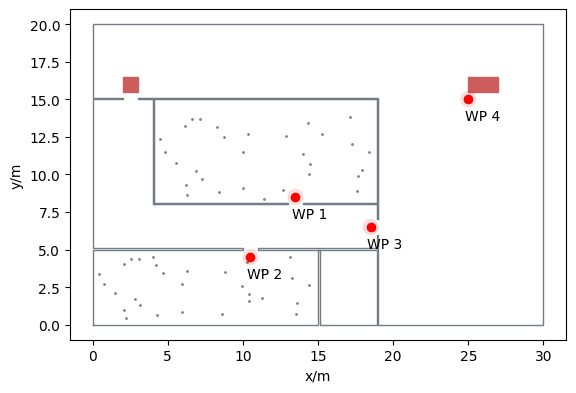

In [11]:
def plot_simulation_configuration(
    walkable_area, starting_positions, exits
):
    axes = pedpy.plot_walkable_area(walkable_area=walkable_area)
    for exit_area in exits:
        axes.fill(*exit_area.exterior.xy, color="indianred")

    for starting_position in starting_positions:
      
        axes.scatter(*zip(*starting_position), s=1, color='gray')    

    axes.set_xlabel("x/m")
    axes.set_ylabel("y/m")
    axes.set_aspect("equal")
    for idx, waypoint in enumerate(waypoints):
        axes.plot(waypoint[0], waypoint[1], "ro")
        axes.annotate(
            f"WP {idx+1}",
            (waypoint[0], waypoint[1]),
            textcoords="offset points",
            xytext=(10, -15),
            ha="center",
        )
        circle = Circle(
            (waypoint[0], waypoint[1]),
            distance_to_waypoints,
            fc="red",
            ec="red",
            alpha=0.1,
        )
        axes.add_patch(circle)


plot_simulation_configuration(
    walkable_area, pos_in_spawning_areas, exits
)

## Specification of Parameters und Running the Simulation

Now we just need to define the details of the operational model as well as the exit.

In [12]:
simulation = jps.Simulation(
    model=jps.SocialForceModel(),
    geometry=walkable_area.polygon,
    trajectory_writer=jps.SqliteTrajectoryWriter(
        output_file=Path(trajectory_file)
    ),
)
exit_ids = [simulation.add_exit_stage(exit_area.exterior.coords[:-1]) for exit_area in exits]

## Define Journey for people in the upper room going right


In [13]:
waypoint_ids = [
    simulation.add_waypoint_stage(waypoint[:-1], distance_to_waypoints)
    for waypoint in waypoints
]
journey_up_right= jps.JourneyDescription([*waypoint_ids, *exit_ids])
journey_up_right.set_transition_for_stage(
        waypoint_ids[0],
        jps.Transition.create_fixed_transition(
            waypoint_ids[2]),
    )
journey_up_right.set_transition_for_stage(
        waypoint_ids[2],
        jps.Transition.create_fixed_transition(
            exit_ids[1]),
    )
journey_up_right_id = simulation.add_journey(journey_up_right)

In [14]:
# unbenutzt: draft
journey1 = jps.JourneyDescription([exit_ids[0]])
journey2 = jps.JourneyDescription([exit_ids[1]])
journey1_id = simulation.add_journey(journey1)
journey2_id = simulation.add_journey(journey2)

## Define Journey for people in the upper room going left


In [15]:
journey_up_left= jps.JourneyDescription([*waypoint_ids, *exit_ids])
journey_up_left.set_transition_for_stage(
        waypoint_ids[0],
        jps.Transition.create_fixed_transition(
            exit_ids[0]),
    )
journey_up_left_id = simulation.add_journey(journey_up_left)

## Define Journey for people in the lower room going right

In [16]:
journey_down_right= jps.JourneyDescription([waypoint_ids[1], waypoint_ids[2], *exit_ids])
journey_down_right.set_transition_for_stage(
        waypoint_ids[1],
        jps.Transition.create_fixed_transition(
            waypoint_ids[2]),
    )
journey_down_right.set_transition_for_stage(
        waypoint_ids[2],
        jps.Transition.create_fixed_transition(
            exit_ids[1]),
    )
journey_down_right_id = simulation.add_journey(journey_down_right)

## Define Journey for people in the lower room going left

In [17]:
journey_down_left= jps.JourneyDescription([*waypoint_ids, *exit_ids])
journey_down_left.set_transition_for_stage(
        waypoint_ids[1],
        jps.Transition.create_fixed_transition(
            exit_ids[0]),
    )
journey_down_left_id = simulation.add_journey(journey_down_left)

## Add agents

First, add leader, then its followers.

In [18]:
ids_up = set(
    [
        simulation.add_agent(
            jps.SocialForceModelAgentParameters(
                desiredSpeed=0,
                radius=0.1,
                journey_id=journey_up_right_id,
                stage_id=waypoint_ids[0],
                position=pos,
            )
        )
        for pos in pos_in_spawning_areas[0]
    ]
)
ids_down = set(
    [
        simulation.add_agent(
            jps.SocialForceModelAgentParameters(
                desiredSpeed=0,
                radius=0.1,
                journey_id=journey_down_right_id,
                stage_id=waypoint_ids[1],
                position=pos,
            )
        )
        for pos in pos_in_spawning_areas[1]
    ]
)
first_agents = list(ids_up)[0]

## Simulation loop

In [19]:
i = 0
simulation.iterate(premovement_time*int(1/simulation.delta_time()))
while simulation.agent_count() > 0:# and simulation.iteration_count() < 100000:
    t = simulation.elapsed_time() # seconds
    if t > times[i]:
        print(f"Time: {t:3.2f}, Agents: {simulation.agent_count()}")
        for agent in simulation.agents():
            condition = False #simulation.iteration_count() > 300
            x, y = agent.position
            condition = (not vis.wp_is_visible(time=t, x=x, y=y, waypoint_id=3)) and (x > waypoints[2][0]+1)
            v = vis.get_local_visibility(time=t, x=x, y=y, c=c0)
            print(f"{t = }, {x = }, {y = }, {v = }, {agent.id =}, {condition =}")
            # getting slower
            agent.model.desiredSpeed = calculate_desired_speed(v, c0, v0)
            # redirection
            if agent.journey_id == journey_up_right_id and condition:
                simulation.switch_agent_journey(agent.id, journey_up_left_id, waypoint_ids[2])
            if agent.journey_id == journey_down_right_id and condition:
                simulation.switch_agent_journey(agent.id, journey_down_left_id, waypoint_ids[2])
        i +=1

    simulation.iterate()
print(f"Simulation finished after {simulation.elapsed_time()} seconds.")

Time: 500.01, Agents: 60
t = 500.01, x = 10.318118337824695, y = 12.697046515084184, v = 30, agent.id =1, condition =False
t = 500.01, x = 6.538812410810789, y = 9.005067215678581, v = 30, agent.id =2, condition =False
t = 500.01, x = 6.820985585364583, y = 10.525495339184083, v = 30, agent.id =3, condition =False
t = 500.01, x = 10.009378681082751, y = 11.486549475643939, v = 30, agent.id =4, condition =False
t = 500.01, x = 7.404599735161185, y = 13.750234266238229, v = 30, agent.id =5, condition =False
t = 500.01, x = 5.080878855803705, y = 12.560724264899568, v = 30, agent.id =6, condition =False
t = 500.01, x = 5.876374462466951, y = 9.752837011494304, v = 30, agent.id =7, condition =False
t = 500.01, x = 8.916093073877885, y = 12.298526377892298, v = 30, agent.id =8, condition =False
t = 500.01, x = 17.15818918044705, y = 13.80527581423706, v = 30, agent.id =9, condition =False
t = 500.01, x = 6.357372772271036, y = 14.007831316307788, v = 30, agent.id =10, condition =False
t = 5

IndexError: range object index out of range

## Visualization

In [ ]:
from jupedsim.internal.notebook_utils import animate, read_sqlite_file
trajectory_data, walkable_area = read_sqlite_file(trajectory_file)
animate(trajectory_data, walkable_area, every_nth_frame=100)